In [75]:
# Step 1: Import necessary Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Step 2: Create the data frame.
dataframe = pd.read_csv("Swiggy.csv")
print(dataframe.head())

                Name    City  Rating  Price           Cuisine      Price Range
0  Janta Sweet House  Abohar     4.4  ₹ 200     Sweets,Bakery         Moderate
1  theka coffee desi  Abohar     3.8  ₹ 100         Beverages  Budget Friendly
2          Singh Hut  Abohar     3.7  ₹ 250  Fast Food,Indian         Moderate
3          Sam Uncle  Abohar     3.6  ₹ 200       Continental         Moderate
4   shere punjab veg  Abohar     4.0  ₹ 150      North Indian  Budget Friendly


In [70]:
# To obtain a summary of the data frame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61417 entries, 0 to 61416
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         61417 non-null  object 
 1   City         61417 non-null  object 
 2   Rating       61417 non-null  float64
 3   Price        61417 non-null  object 
 4   Cuisine      61417 non-null  object 
 5   Price Range  61417 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.8+ MB


In [71]:
# Before proceeding, let’s convert the data type of the “Price” column to float

# Function to handle invalid values and convert the data type of the "Price" column to int
def handlePrice(value):
    try:
        # Remove the "₹" symbol and convert to int
        return float(value.replace('₹', '').strip())
    except (ValueError, AttributeError):
        return None  # Return None for invalid or missing data

# Apply the function to the "Price" column
dataframe['Price'] = dataframe['Price'].apply(handlePrice)


print(dataframe.head())


                Name    City  Rating  Price           Cuisine      Price Range
0  Janta Sweet House  Abohar     4.4  200.0     Sweets,Bakery         Moderate
1  theka coffee desi  Abohar     3.8  100.0         Beverages  Budget Friendly
2          Singh Hut  Abohar     3.7  250.0  Fast Food,Indian         Moderate
3          Sam Uncle  Abohar     3.6  200.0       Continental         Moderate
4   shere punjab veg  Abohar     4.0  150.0      North Indian  Budget Friendly


In [72]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61417 entries, 0 to 61416
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         61417 non-null  object 
 1   City         61417 non-null  object 
 2   Rating       61417 non-null  float64
 3   Price        61417 non-null  float64
 4   Cuisine      61417 non-null  object 
 5   Price Range  61417 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.8+ MB


In [73]:
# Function to handle invalid values and convert the data type of the “Rating” column to int

def handleRating(value):
    try:
        return int(float(value))  # Convert to float first, then to int
    except (ValueError, TypeError):
        return None  # Return None for invalid or missing data

# Apply the function to the "Rating" column
dataframe['Rating'] = dataframe['Rating'].apply(handleRating)

# Replace None/NaN with a default value (e.g., 0)
dataframe['Rating'] = dataframe['Rating'].fillna(0).astype(int)

print(dataframe.head())



                Name    City  Rating  Price           Cuisine      Price Range
0  Janta Sweet House  Abohar       4  200.0     Sweets,Bakery         Moderate
1  theka coffee desi  Abohar       3  100.0         Beverages  Budget Friendly
2          Singh Hut  Abohar       3  250.0  Fast Food,Indian         Moderate
3          Sam Uncle  Abohar       3  200.0       Continental         Moderate
4   shere punjab veg  Abohar       4  150.0      North Indian  Budget Friendly


In [74]:
# To obtain a summary of the data frame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61417 entries, 0 to 61416
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         61417 non-null  object 
 1   City         61417 non-null  object 
 2   Rating       61417 non-null  int64  
 3   Price        61417 non-null  float64
 4   Cuisine      61417 non-null  object 
 5   Price Range  61417 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.8+ MB


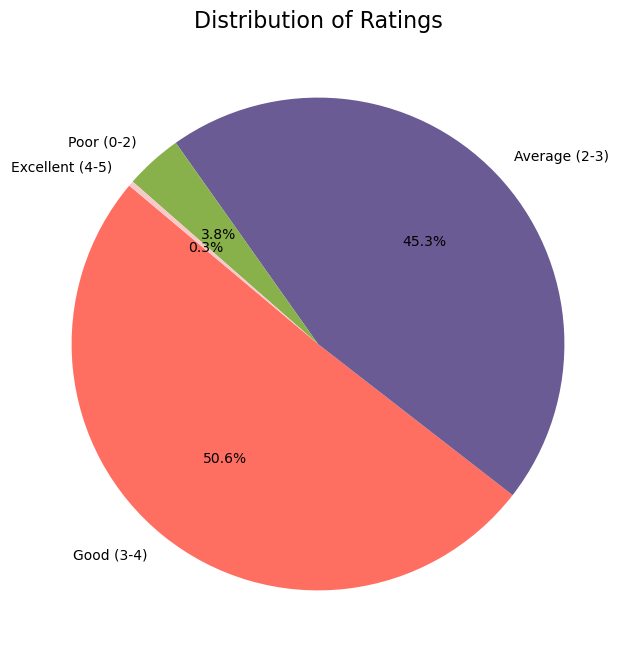

In [ ]:

# Step 1 : Distribution of Ratings as a Pie Chart

# Categorize ratings into bins for better visualization
# Simplified: Create rating bins and count occurrences

rating_distribution = pd.cut(
    dataframe['Rating'], 
    bins=[0, 2, 3, 4, 5], 
    labels=['Poor (0-2)', 'Average (2-3)', 'Good (3-4)', 'Excellent (4-5)']
).value_counts()

# Plot the pie chart
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
plt.figure(figsize=(8, 8))
plt.pie(
    rating_distribution, 
    labels=rating_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Distribution of Ratings', fontsize=16)
plt.show()



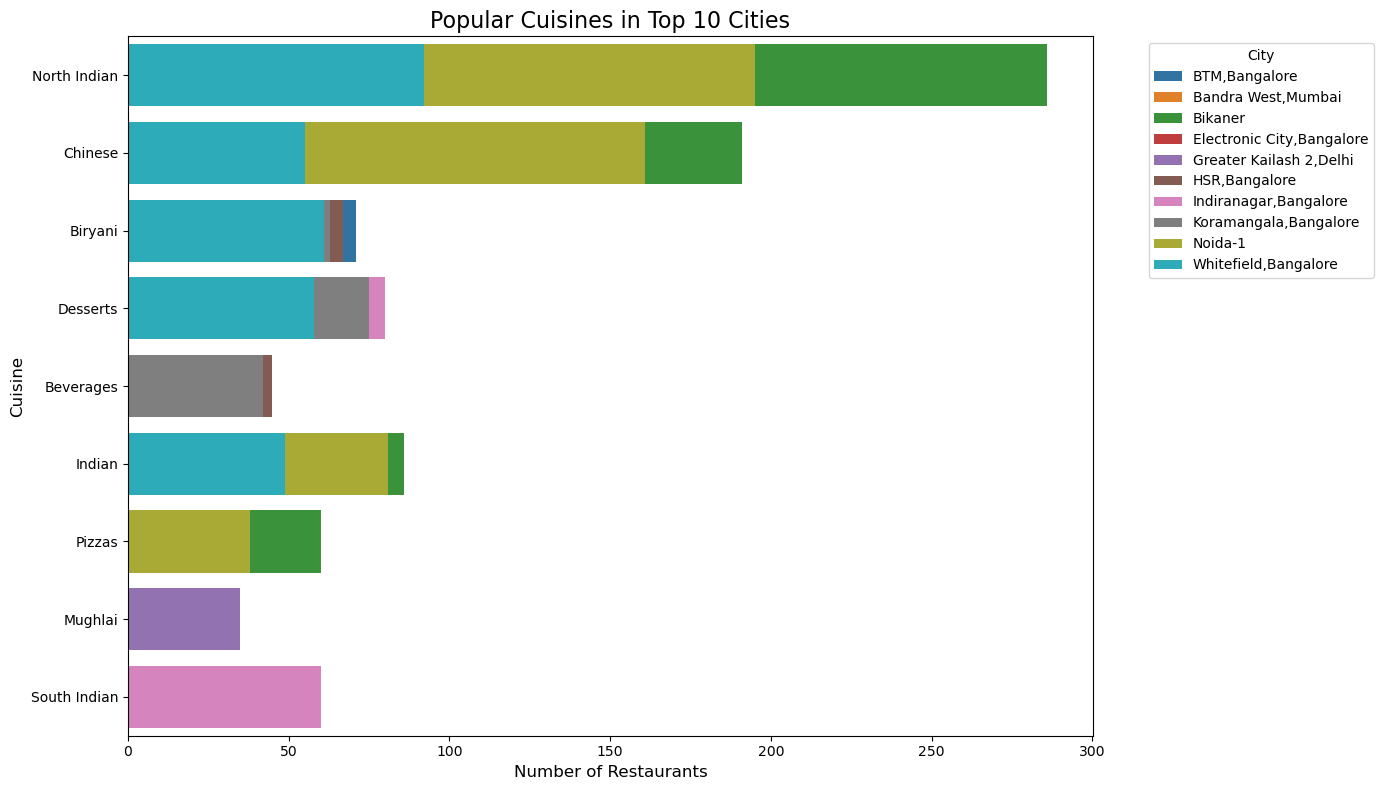

In [78]:
# Step 2: Popular Cuisines in Different Cities

# Split the cuisines into individual entries for accurate counting
data_expanded = dataframe.assign(Cuisine=dataframe['Cuisine'].str.split(','))
data_exploded = data_expanded.explode('Cuisine')

# Get the top 5 cuisines in each city
popular_cuisines = (
    data_exploded.groupby(['City', 'Cuisine'])
    .size()
    .reset_index(name='Count')
    .sort_values(['City', 'Count'], ascending=[True, False])
)
top_cuisines_per_city = popular_cuisines.groupby('City').head(5)

# Visualization: Top cuisines in top 10 cities by restaurant count
top_cities = dataframe['City'].value_counts().head(10).index
filtered_cuisines = top_cuisines_per_city[top_cuisines_per_city['City'].isin(top_cities)]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_cuisines, 
    x='Count', 
    y='Cuisine', 
    hue='City', 
    dodge=False, 
    palette='tab10'
)
plt.title('Popular Cuisines in Top 10 Cities', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


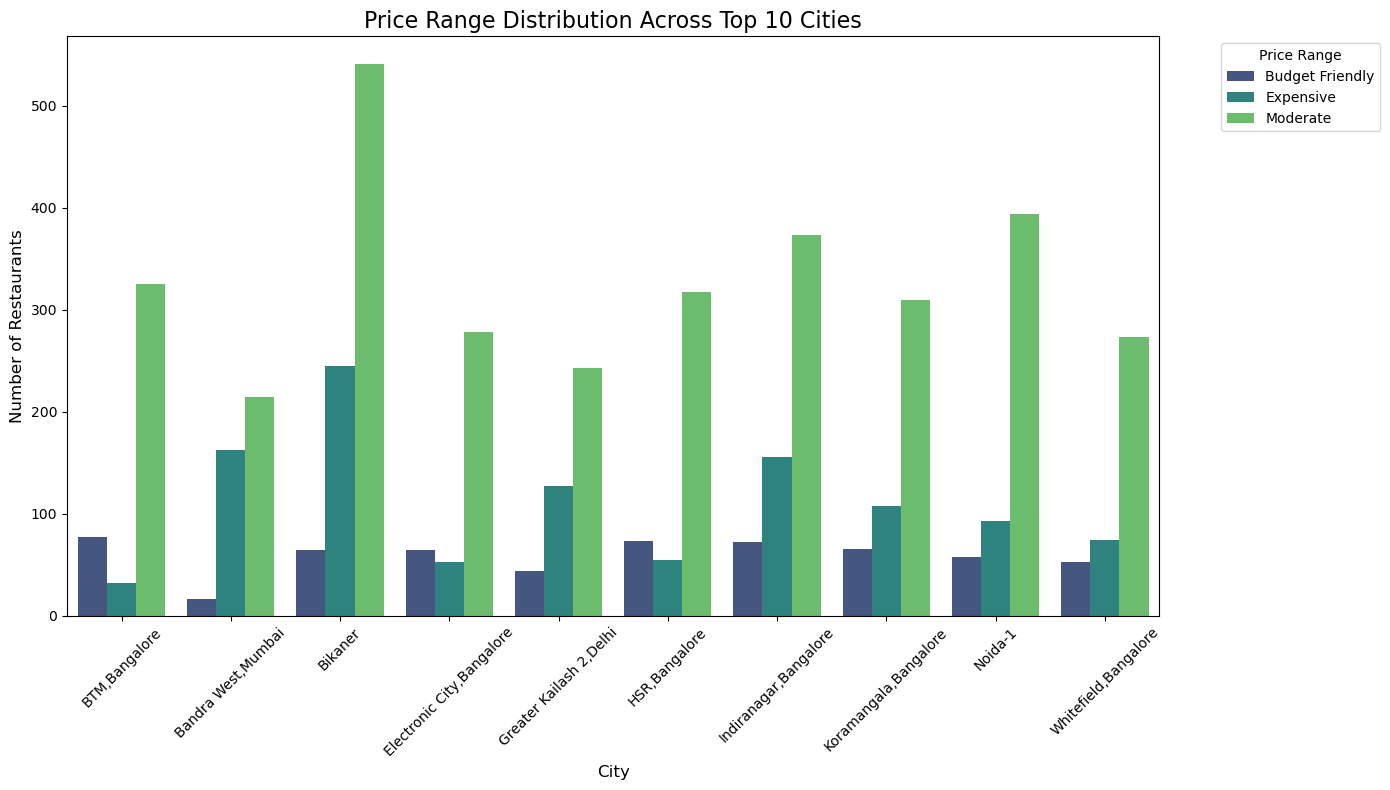

In [79]:
# Step 3: Price Range Analysis Across Cities

# Count the occurrences of each price range in the top 10 cities
price_range_distribution = (
    dataframe[dataframe['City'].isin(top_cities)]
    .groupby(['City', 'Price Range'])
    .size()
    .reset_index(name='Count')
)

# Visualization: Price Range Distribution
plt.figure(figsize=(14, 8))
sns.barplot(
    data=price_range_distribution,
    x='City',
    y='Count',
    hue='Price Range',
    palette='viridis'
)
plt.title('Price Range Distribution Across Top 10 Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_23666/1702191793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


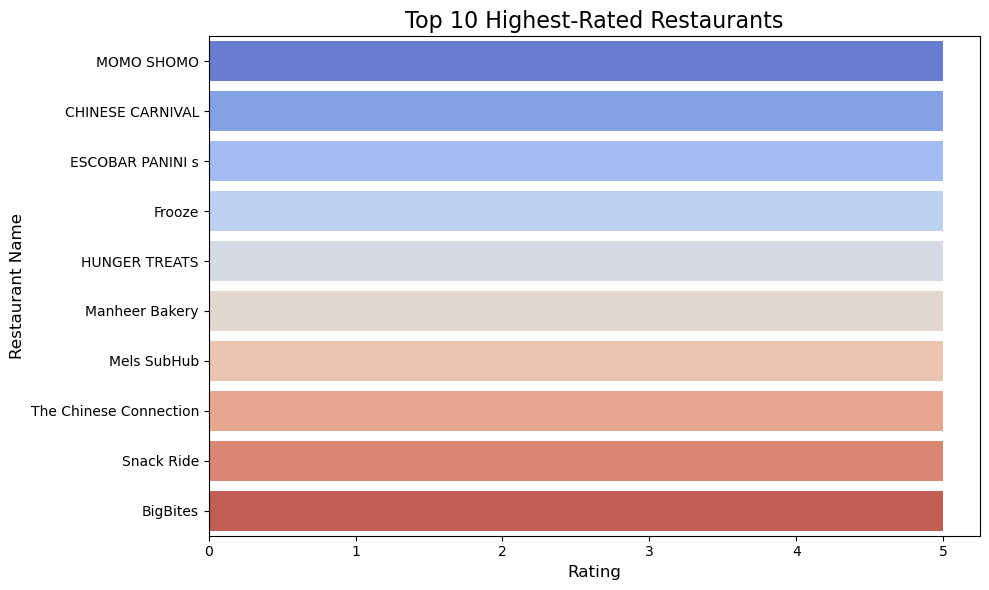

,Name,City,Rating,Cuisine,Price
0,MOMO SHOMO,"Hazratganj,Lucknow",5,Chinese,200.0
1,CHINESE CARNIVAL,"Villivakkam,Chennai",5,"Chinese,Beverages",300.0
2,ESCOBAR PANINI s,"BTM,Bangalore",5,"Fast Food,Beverages",350.0
3,Frooze,"Indiranagar,Bangalore",5,"Ice Cream,Desserts",250.0
4,HUNGER TREATS,"Arekere,Bangalore",5,"Burgers,Snacks",300.0
5,Manheer Bakery,"Aliganj,Lucknow",5,Bakery,150.0
6,Mels SubHub,"BTM,Bangalore",5,"Fast Food,Beverages",350.0
7,The Chinese Connection,"Mahadevpura,Bangalore",5,Chinese,250.0
8,Snack Ride,"Arekere,Bangalore",5,"Snacks,Chaat",250.0
9,BigBites,"R.T. Nagar,Bangalore",5,"Street Food,Tex-Mex",300.0


In [80]:
# Step 4: Top-Rated Restaurants

# Filter the top 10 highest-rated restaurants
top_rated_restaurants = dataframe.sort_values('Rating', ascending=False).head(10)

# Visualization: Top 10 Restaurants by Rating
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_rated_restaurants, 
    x='Rating', 
    y='Name', 
    palette='coolwarm'
)
plt.title('Top 10 Highest-Rated Restaurants', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.tight_layout()
plt.show()

# Display the top-rated restaurants as a table
top_rated_restaurants[['Name', 'City', 'Rating', 'Cuisine', 'Price']].reset_index(drop=True)


/tmp/ipykernel_23666/1843446404.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


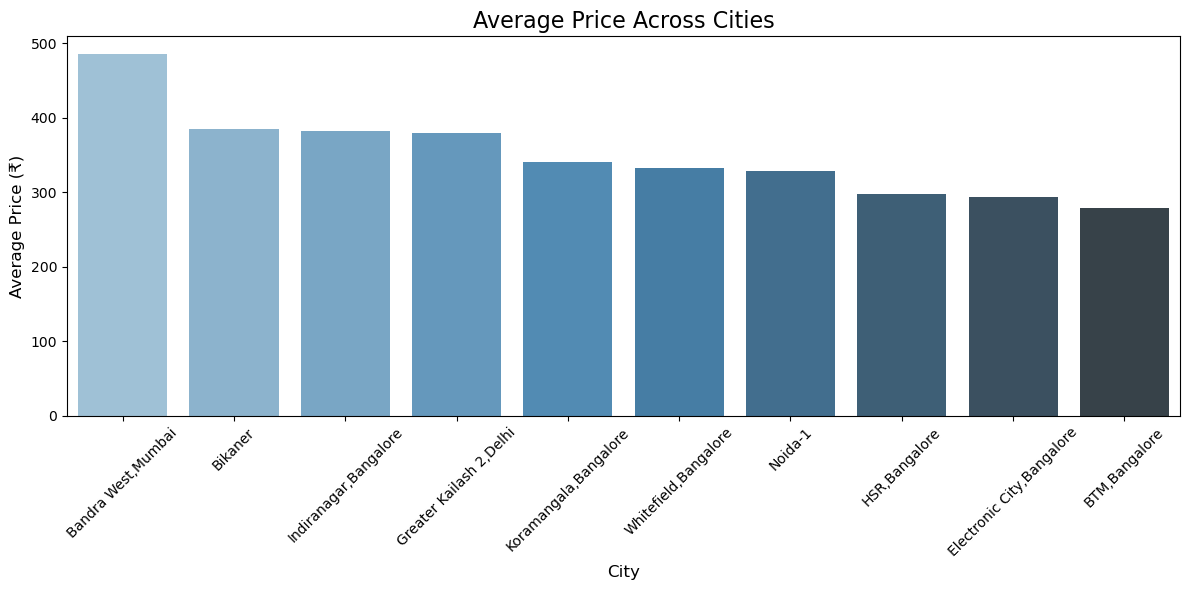

In [82]:
# Step 5: Average Price Comparison

# Average price across cities (top 10 cities only)
avg_price_cities = (
    dataframe[dataframe['City'].isin(top_cities)]
    .groupby('City')['Price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualization: Average Price Across Cities
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_price_cities, 
    x='City', 
    y='Price', 
    palette='Blues_d'
)
plt.title('Average Price Across Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
